In [24]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe, cat_pipe

In [25]:
data = pd.read_csv('data.csv')
data

,Jenis Kelamin,Umur Karyawan,Gaji,Status,Transportasi
0,Laki-Laki,20,8000000,Single,Kendaraan pribadi
1,Laki-Laki,35,14000000,Single,Kendaraan umum
2,Perempuan,26,10000000,Single,Kendaraan umum
3,Perempuan,27,12000000,Menikah,Kendaraan pribadi
4,Laki-Laki,21,9000000,Single,Kendaraan pribadi
5,Laki-Laki,22,11000000,Single,Kendaraan pribadi
6,Perempuan,32,15000000,Menikah,Kendaraan umum
7,Perempuan,26,8000000,Menikah,Kendaraan umum
8,Laki-Laki,25,9000000,Single,Kendaraan umum
9,Perempuan,20,10000000,Single,Kendaraan pribadi


In [26]:
ecdr = LabelEncoder()
data['Transportasi'] = ecdr.fit_transform(data['Transportasi'])
data

,Jenis Kelamin,Umur Karyawan,Gaji,Status,Transportasi
0,Laki-Laki,20,8000000,Single,0
1,Laki-Laki,35,14000000,Single,1
2,Perempuan,26,10000000,Single,1
3,Perempuan,27,12000000,Menikah,0
4,Laki-Laki,21,9000000,Single,0
5,Laki-Laki,22,11000000,Single,0
6,Perempuan,32,15000000,Menikah,1
7,Perempuan,26,8000000,Menikah,1
8,Laki-Laki,25,9000000,Single,1
9,Perempuan,20,10000000,Single,0


In [27]:
x = data.drop(columns='Transportasi')
y = data.Transportasi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Umur Karyawan','Gaji']),
    ('categoric', cat_pipe(encoder='onehot'), ['Jenis Kelamin', 'Status'])
])

In [29]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [30]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Umur Karyawan', 'Gaji']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Jenis Kelamin',
                                                   'Status'])])),
                ('algo', GaussianNB())])

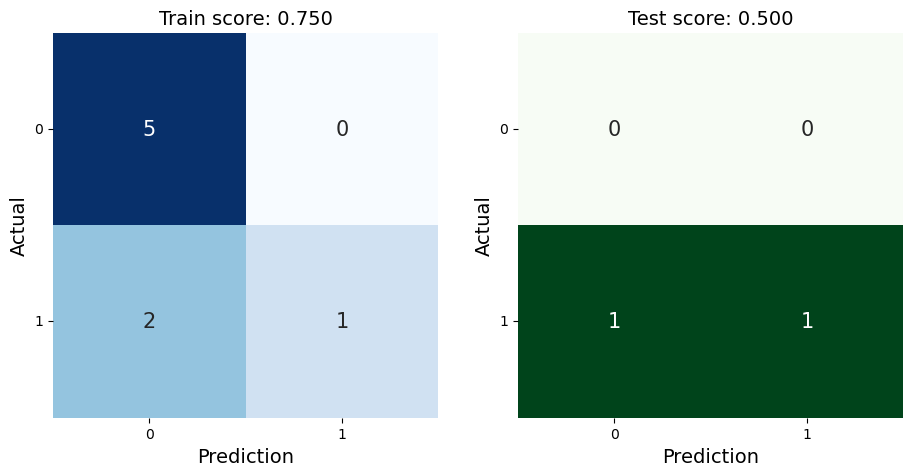

In [31]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(x_train, y_train, x_test, y_test, pipeline)

# Prediksi

In [32]:
x_prediction = pd.read_csv("test.csv")
x_prediction

,Jenis Kelamin,Umur Karyawan,Gaji,Status
0,Perempuan,27,12000000,Single
1,Laki-Laki,35,14000000,Menikah


In [33]:
pipeline.predict(x_prediction)

array([0, 1])

In [34]:
data_transportasi = []

for transportasi in pipeline.predict(x_prediction):
    if transportasi == 0:
        transportasi = 'Kendaraan pribadi'
    elif transportasi == 1:
        transportasi = 'Kendaraan umum'
    
    data_transportasi.append(transportasi)

x_prediction['Transportasi'] = data_transportasi
x_prediction

,Jenis Kelamin,Umur Karyawan,Gaji,Status,Transportasi
0,Perempuan,27,12000000,Single,Kendaraan pribadi
1,Laki-Laki,35,14000000,Menikah,Kendaraan umum
